In [1]:
import cv2
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from scipy.special import softmax

In [2]:
pd_data = pd.read_csv("./train.csv")

In [3]:
np_data = np.array(pd_data) # Convert data to np array

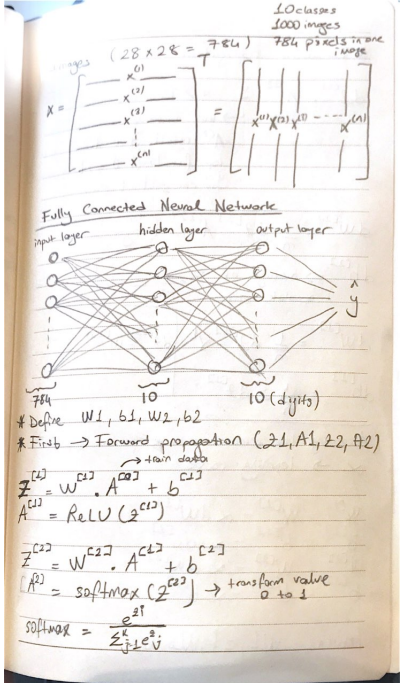

In [4]:
#print(np_data)
m, n = np_data.shape
#print(m,n)
np.random.shuffle(np_data)

data_inference = np_data[0:1000].T # Transpose for change data, each column is image
inference_labels = data_inference[0]
inference_data = data_inference[1:n]
inference_data = inference_data / 255.

data_train = np_data[1000:m].T # 1000 to last image is train dataset
train_labels = data_train[0]
train_data = data_train[1:n]
train_data = train_data / 255.

In [5]:
def create_network():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2
    

In [6]:
#W1,b1,W2,b2 = create_network()
#print(W1,b1,W2,b2)

In [7]:
def forward_propagation(W1,b1,W2,b2,train_data): # Returns Z1,A1,Z2,A2
    Z1 = W1.dot(train_data) + b1 # Z1 = W1.A0 + b1
    A1 = np.maximum(Z1,0) # This is ReLU function A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2 # Z2 = W2.A1 + b2
    A2 = np.exp(Z2) / sum(np.exp(Z2)) # A2 softmax(Z2) softmax function that transform value 0 to 1
    return Z1,A1,Z2,A2
    

In [8]:
#Z1,A1,Z2,A2 = forward_propagation(W1,b1,W2,b2, train_data)
#print(A2)

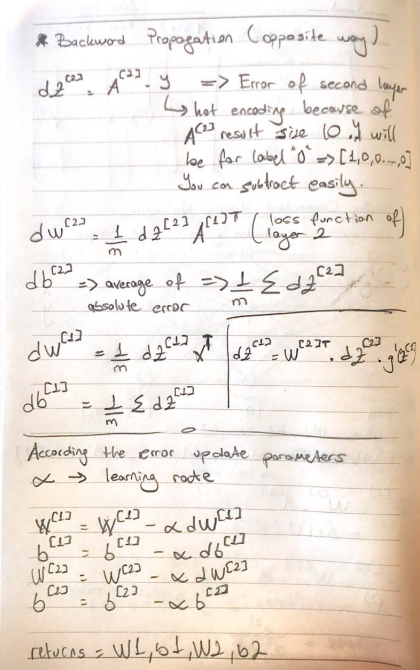

In [9]:
def relu_derivative(Z):
    return (Z > 0).astype(int)

def hot_encode_labels(Y): # #To organize labels ie: label 0 represents [1,0,0,...,0]
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    encoded_labels = hot_encode_labels(Y)
    dZ2 = A2 - encoded_labels # Error of second layer
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1/m * dZ2.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2
    

In [10]:
#dZ2, dW2, db2, dZ1, dW1, db1 = backward_propagation(Z1, A1, Z2, A2, train_data, hot_encode_labels, W2, W1)
#print(dZ2, dW2, db2, dZ1, dW1, db1)

In [11]:
def update_error_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2
    

In [12]:
#W1, b1, W2, b2 = update_error_parameters(W1,b1,W2,b2,dW1,db1,dW2,db2, 0.500)
#print(W1, b1, W2, b2)
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, learning_rate, iterations):
    W1, b1, W2, b2 = create_network()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_error_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2



In [13]:
W1, b1, W2, b2 = gradient_descent(train_data, train_labels, 0.2, 2000)

Iteration:  0
[8 5 9 ... 4 9 5] [5 1 4 ... 6 7 2]
0.10739024390243902
Iteration:  100
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8163414634146341
Iteration:  200
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8573170731707317
Iteration:  300
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8733414634146341
Iteration:  400
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8826829268292683
Iteration:  500
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8884146341463415
Iteration:  600
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.893219512195122
Iteration:  700
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8970731707317073
Iteration:  800
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.8997804878048781
Iteration:  900
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.9020975609756098
Iteration:  1000
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.9035609756097561
Iteration:  1100
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.9053170731707317
Iteration:  1200
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.9071707317073171
Iteration:  1300
[5 1 5 ... 6 7 2] [5 1 4 ... 6 7 2]
0.9084146341463415
Iter

Prediction:  [5]
Label:  5


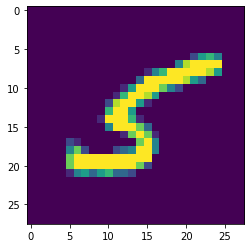

Prediction:  [4]
Label:  4


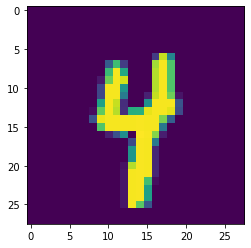

Prediction:  [9]
Label:  8


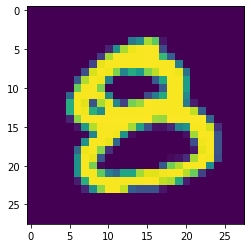

Prediction:  [6]
Label:  0


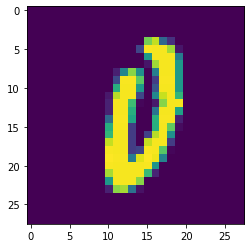

Prediction:  [8]
Label:  8


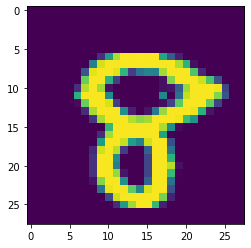

Prediction:  [9]
Label:  9


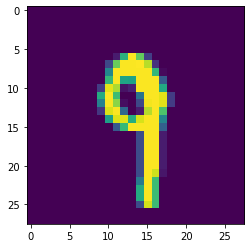

Prediction:  [5]
Label:  5


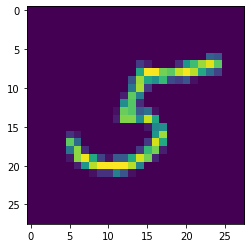

Prediction:  [3]
Label:  3


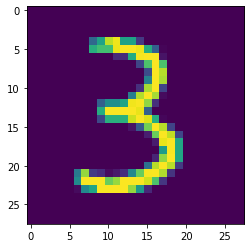

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = inference_data[:, index, None]
    prediction = make_predictions(inference_data[:, index, None], W1, b1, W2, b2)
    label = inference_labels[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(33, W1, b1, W2, b2)
test_prediction(234, W1, b1, W2, b2)
test_prediction(112, W1, b1, W2, b2)
test_prediction(131, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(99, W1, b1, W2, b2)
test_prediction(24, W1, b1, W2, b2)
test_prediction(67, W1, b1, W2, b2)